In [1]:
!unzip /content/STAT+S01V18.zip

Archive:  /content/STAT+S01V18.zip
  inflating: customer_income_data.csv  
  inflating: Solution_for_Project_2.ipynb  


In [2]:
import pandas as pd
import numpy as np

In [3]:
cust_data = pd.read_csv("/content/customer_income_data.csv")
cust_data

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1
...,...,...,...,...,...,...,...,...
195,1196,Female,54,Delhi,317466.42070,601,52,4
196,1197,Female,20,Bengaluru,323305.50020,554,58,1
197,1198,Male,44,Chennai,109058.54430,844,36,2
198,1199,Male,28,Delhi,160116.89300,837,24,4


In [4]:
cust_data.dtypes

CustomerID          int64
CustomerGender     object
CustomerAge         int64
CustomerCity       object
AnnualIncome      float64
CreditScore         int64
SpendingScore       int64
CustomerCityID      int64
dtype: object

Check for Null values

In [5]:
cust_data.isna().sum()

CustomerID        0
CustomerGender    0
CustomerAge       0
CustomerCity      0
AnnualIncome      0
CreditScore       0
SpendingScore     0
CustomerCityID    0
dtype: int64

**Calculate measures of central tendency-mean, median, mode for annual income column**

In [9]:
#Mean
print("Annual income column mean:", cust_data['AnnualIncome'].mean())
print("Annual income column median:", cust_data['AnnualIncome'].median())
print("Annual income column mode:\n", cust_data['AnnualIncome'].mode())

Annual income column mean: 285143.93164644
Annual income column median: 263418.50555
Annual income column mode:
 0        2577.057456
1        5121.652342
2       10349.414070
3       12396.061280
4       15305.842870
           ...      
195    651534.309800
196    671028.187200
197    675461.735700
198    687212.770700
199    695407.091700
Name: AnnualIncome, Length: 200, dtype: float64


**Calculate variance, standard deviation and skewness for spending score column**

In [10]:
from scipy.stats import skew
print("Variance of spending score column:",cust_data['SpendingScore'].var())
print("Standard Deviation of spending score column:",cust_data['SpendingScore'].std())
print("Skewness of spending score column:",skew(cust_data['SpendingScore']))

Variance of spending score column: 824.9929396984925
Standard Deviation of spending score column: 28.722690328353515
Skewness of spending score column: 0.10081837365183154


From the above output we can say that the spending score column has a lot of variation and is positively skewed.

**Detect outliers based on data in AnnualIncome and SpendingScore columns using z-score**

In [12]:
from scipy.stats import zscore
print("Annual income column Z-score:")
print(zscore(cust_data['AnnualIncome']))
print("\n")
print("Spending Score column Z-score:")
print(zscore(cust_data['SpendingScore']))

Annual income column Z-score:
0      1.435993
1     -0.462074
2     -0.715143
3     -1.356137
4     -0.171497
         ...   
195    0.191478
196    0.226068
197   -1.043125
198   -0.740657
199   -0.029990
Name: AnnualIncome, Length: 200, dtype: float64


Spending Score column Z-score:
0      0.952679
1      0.429133
2      0.638551
3     -0.722668
4     -1.560341
         ...   
195    0.045199
196    0.254618
197   -0.513249
198   -0.932086
199   -0.687765
Name: SpendingScore, Length: 200, dtype: float64


In [13]:
(zscore(cust_data['AnnualIncome'])).mean()

-2.6645352591003756e-17

- The above ouptut essentially indicates that your data is well-centered around the mean.
- This mean z-score value suggests that there is no significant overall shift in the data, and the distribution is likely symmetric.

In [17]:
(zscore(cust_data['SpendingScore'])).mean()

4.4408920985006264e-17

The same conclusion as the above one can be derived from this output as well.

In [23]:
z = np.abs(zscore(cust_data[['AnnualIncome', 'SpendingScore']]))
z

,AnnualIncome,SpendingScore
0,1.435993,0.952679
1,0.462074,0.429133
2,0.715143,0.638551
3,1.356137,0.722668
4,0.171497,1.560341
...,...,...
195,0.191478,0.045199
196,0.226068,0.254618
197,1.043125,0.513249
198,0.740657,0.932086


In [26]:
np.where(z > 2)

(array([ 62,  65, 114, 148, 155, 166, 171, 177, 194]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]))

The above output indicates the row numbers having z-score greater than 2. The condition we gave in the above code indicates that all the z-score values above 2 will be considered as outliers.

**Detect outliers based on data in CustomerAge and SpendingScore columns using scatter plot**

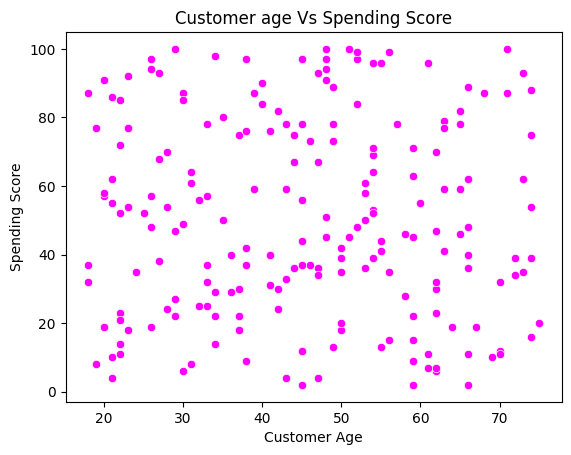

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = cust_data['CustomerAge'], y = cust_data['SpendingScore'], color = 'magenta')
plt.xlabel("Customer Age")
plt.ylabel("Spending Score")
plt.title("Customer age Vs Spending Score")
plt.show()

The above output indicates that there are no outliers present in the visualization and it is a fairly random distribution of data points.